<a href="https://colab.research.google.com/github/Arif-X/API-Documentation-HTML-Template/blob/master/Model_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import numpy
import matplotlib.pyplot
import random
import pandas

def sigmoid(sop):
    return 1.0/(1+numpy.exp(-1*sop))

def error(predicted, target):
    return numpy.power(predicted-target, 2)

def error_predicted_deriv(predicted, target):
    return 2*(predicted-target)

def sigmoid_sop_deriv(sop):
    return sigmoid(sop)*(1.0-sigmoid(sop))

def sop_w_deriv(x):
    return x

def update_w(w, grad, learning_rate):
    return w - learning_rate*grad

def mape(actual, pred): 
    actual, pred = numpy.array(actual), numpy.array(pred)
    return numpy.mean(numpy.abs((actual - pred) / actual)) * 100

def mse(actual, pred):
    return numpy.square(numpy.subtract(actual, pred)).mean()

input = []
for i in range(4):
    input.append(round(numpy.random.uniform(0,1), 1))

x = numpy.array(input)
# target = numpy.array([0.2])
kota_kab = ['Kota Surabaya','Kabupaten Gresik','Kabupaten Sidoarjo','Kabupaten Pasuruan','Kabupaten Mojokerto','Kabupaten Malang','Kota Malang','Kota Pasuruan','Kota Batu','Kabupaten Jombang','Kabupaten Probolinggo','Kabupaten Tuban','Kota Mojokerto','Kabupaten Lamongan','Kota Probolinggo','Kabupaten Jember','Kabupaten Banyuwangi','Kota Kediri','Kabupaten Bojonegoro','Kabupaten Kediri','Kota Blitar','Kabupaten Tulungagung','Kabupaten Blitar','Kabupaten Lumajang','Kota Madiun','Kabupaten Sumenep','Kabupaten Nganjuk','Kabupaten Ngawi','Kabupaten Pacitan','Kabupaten Bondowoso','Kabupaten Madiun','Kabupaten Magetan','Kabupaten Bangkalan','Kabupaten Ponorogo','Kabupaten Trenggalek','Kabupaten Situbondo','Kabupaten Pamekasan','Kabupaten Sampang']
kota_kab.sort()
target = [1956773.48, 2328899.12, 2015071.18, 2079568.07, 1958640.12, 4372030.51, 2355662.91, 2654095.88, 2043422.93, 2043422.93, 2000607.20, 1958410.31, 1957329.43, 3068275.36, 4354787.17, 1970006.41, 1962585.99, 1961154.77, 1939686.39, 4365133.19, 1954281.32, 2553265.95, 1922122.97, 4368581.85, 1942750.77, 1978927.22, 1944932.74, 2539224.88, 2029358.67, 2830367.09, 2039024.44, 2118116.63, 1991105.79, 2994143.98, 2510452.36, 2838837.64, 2376240.63, 4375479.19,]
# kota_kab = ['Kota Surabaya','Kabupaten Mojokerto','Kabupaten Gresik']
# target = [4375479.19,2838837.64,4372030.51]
map(float, target)

learning_rate = 0.001

# Number of inputs, number of neurons per each hidden layer, number of output neurons (which must be 1 at this time)
network_architecture = numpy.array([x.shape[0], 2, 1])

# Initializing the weights of the entire network
w = []
for i in range(len(target)):
    w.append([])
w_temp = []
for layer_counter in numpy.arange(network_architecture.shape[0]-1):
    for neuron_nounter in numpy.arange(network_architecture[layer_counter+1]):
        w_temp.append(numpy.random.rand(network_architecture[layer_counter]).round(1))
    for i in range(len(target)):
        w[i].append(numpy.array(w_temp))
    w_temp = []
    # w.append(numpy.array(w_temp))

w = numpy.array(w)
w_old = w
print(x)
print(w[0])

[0.  0.9 0.6 0.2]
[array([[0.5, 0.9, 0.6, 0.5],
        [0.6, 0.2, 0.7, 0.6]]) array([[0.8, 0. ]])]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:62: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


In [11]:
network_error = []
predicted_output = []

for i in range(len(target)):
    predicted_output.append([])
    network_error.append([])
    target[i] = target[i]/10000000

old_err = 0
epoch = 50000
for i in range(len(target)):
    for k in range(epoch):
        # Forward Pass
        # Hidden Layer Calculations
        if(k == 0):
            sop_hidden = 0
            sig_hidden = 0
            sop_output = 0
            predicted = 0
            err = 0
            g1 = 0
            g2 = 0
            g3 = 0
            g4 = 0
            g5 = 0
            grad_hidden_output = 0
            grad_hidden_input = 0

        sop_hidden = numpy.matmul(w[i][0], x)

        sig_hidden = sigmoid(sop_hidden)

        # Output Layer Calculations
        sop_output = numpy.sum(w[i][1][0]*sig_hidden)
   
        predicted = sigmoid(sop_output)
        err = error(predicted, target[i])

        predicted_output[i].append(predicted)
        network_error[i].append(err)

        # Backward Pass
        g1 = error_predicted_deriv(predicted, target[i])

        ### Working with weights between hidden and output layer
        g2 = sigmoid_sop_deriv(sop_output)
        g3 = sop_w_deriv(sig_hidden)
        grad_hidden_output = g3*g2*g1
        w[i][1][0] = update_w(w[i][1][0], grad_hidden_output, learning_rate)

        ### Working with weights between input and hidden layer
        g5 = sop_w_deriv(x)
        for neuron_idx in numpy.arange(w[i][0].shape[0]):
            g3 = sop_w_deriv(w_old[i][1][0][neuron_idx])
            g4 = sigmoid_sop_deriv(sop_hidden[neuron_idx])
            grad_hidden_input = g5*g4*g3*g2*g1
            w[i][0][neuron_idx] = update_w(w[i][0][neuron_idx], grad_hidden_input, learning_rate)

        w_old[i] = w[i]
    print(kota_kab[i] + ' = %1.8f' %predicted_output[i][epoch-1])

Kabupaten Bangkalan = 0.20217453
Kabupaten Banyuwangi = 0.23657609
Kabupaten Blitar = 0.20745316
Kabupaten Bojonegoro = 0.21334624
Kabupaten Bondowoso = 0.20234281
Kabupaten Gresik = 0.43751854
Kabupaten Jember = 0.23910589
Kabupaten Jombang = 0.26767591
Kabupaten Kediri = 0.21003703
Kabupaten Lamongan = 0.21003703
Kabupaten Lumajang = 0.20613910
Kabupaten Madiun = 0.20232209
Kabupaten Magetan = 0.20222464
Kabupaten Malang = 0.30809054
Kabupaten Mojokerto = 0.43579837
Kabupaten Nganjuk = 0.20336853
Kabupaten Ngawi = 0.20269868
Kabupaten Pacitan = 0.20256958
Kabupaten Pamekasan = 0.20063652
Kabupaten Pasuruan = 0.43683046
Kabupaten Ponorogo = 0.20194995
Kabupaten Probolinggo = 0.25795699
Kabupaten Sampang = 0.19906012
Kabupaten Sidoarjo = 0.43717450
Kabupaten Situbondo = 0.20091203
Kabupaten Sumenep = 0.20417486
Kabupaten Trenggalek = 0.20110829
Kabupaten Tuban = 0.25660844
Kabupaten Tulungagung = 0.20875394
Kota Batu = 0.28479316
Kota Blitar = 0.20963547
Kota Kediri = 0.21689333
Kota M

In [12]:
dataframe = {
    'kota_kab': [],
    'actual': [],
    'prediction': [],
    'error': [],
    'mse': [],
    'mape': [],
    'accuracy': []
}

for i in range(len(target)):
    dataframe['kota_kab'].append(kota_kab[i])
    dataframe['actual'].append(target[i]*10000000)
    dataframe['prediction'].append(predicted_output[i][-1]*10000000)
    dataframe['error'].append(network_error[i][-1])
    dataframe['mse'].append(mse(target[i], predicted_output[i][-1]))
    dataframe['mape'].append(mape(target[i], predicted_output[i][-1]))
    dataframe['accuracy'].append(100-mape(target[i], predicted_output[i][-1]))

df = pandas.DataFrame(dataframe)
df.set_index('kota_kab')

df

,kota_kab,actual,prediction,error,mse,mape,accuracy
0,Kabupaten Bangkalan,1956773.48,2.021745e+06,4.221340e-05,4.221340e-05,3.320356,96.679644
1,Kabupaten Banyuwangi,2328899.12,2.365761e+06,1.358791e-05,1.358791e-05,1.582799,98.417201
2,Kabupaten Blitar,2015071.18,2.074532e+06,3.535536e-05,3.535536e-05,2.950783,97.049217
3,Kabupaten Bojonegoro,2079568.07,2.133462e+06,2.904604e-05,2.904604e-05,2.591614,97.408386
4,Kabupaten Bondowoso,1958640.12,2.023428e+06,4.197477e-05,4.197477e-05,3.307802,96.692198
5,Kabupaten Gresik,4372030.51,4.375185e+06,9.953482e-08,9.953482e-08,0.072161,99.927839
6,Kabupaten Jember,2355662.91,2.391059e+06,1.252876e-05,1.252876e-05,1.502592,98.497408
7,Kabupaten Jombang,2654095.88,2.676759e+06,5.136213e-06,5.136213e-06,0.853896,99.146104
8,Kabupaten Kediri,2043422.93,2.100370e+06,3.243000e-05,3.243000e-05,2.786860,97.213140
9,Kabupaten Lamongan,2043422.93,2.100370e+06,3.243000e-05,3.243000e-05,2.786860,97.213140


Text(0, 0.5, 'Gaji PerUMK')

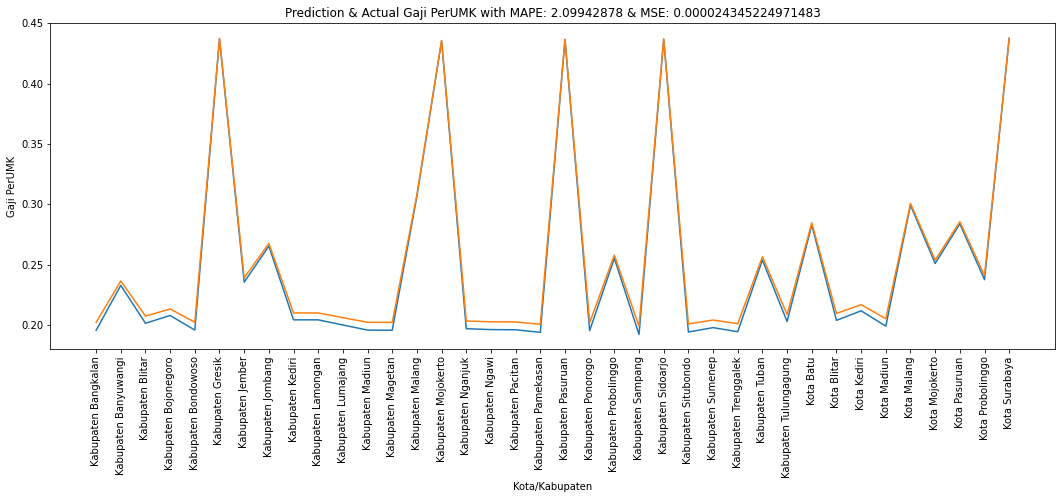

In [14]:
predict = []

for i in range(len(target)):
    predict.append(predicted_output[i][-1])

matplotlib.pyplot.figure(figsize=(18,6))
matplotlib.pyplot.plot(kota_kab, target)
matplotlib.pyplot.plot(predict)
matplotlib.pyplot.xticks(rotation = 90)
matplotlib.pyplot.title("Prediction & Actual Gaji PerUMK with MAPE: %1.8f & MSE: %1.18f" %(mape(target, predict),mse(target, predict)))
matplotlib.pyplot.xlabel("Kota/Kabupaten")
matplotlib.pyplot.ylabel("Gaji PerUMK")

In [ ]:
for i in range(len(target)):
    matplotlib.pyplot.figure(figsize=(18,6))
    matplotlib.pyplot.plot(network_error[i])
    matplotlib.pyplot.title("Iteration Number vs Error " + kota_kab[i])
    matplotlib.pyplot.xlabel("Iteration Number")
    matplotlib.pyplot.ylabel("Error")

    # matplotlib.pyplot.figure()
    # matplotlib.pyplot.plot(predicted_output[i])
    # matplotlib.pyplot.title("Iteration Number vs Prediction " + kota_kab[i])
    # matplotlib.pyplot.xlabel("Iteration Number")
    # matplotlib.pyplot.ylabel("Prediction")